In [14]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

import warnings
warnings.filterwarnings('ignore')

# Getting the Data


In [15]:
eth_usd = yf.Ticker("ETH-USD").history('5y')
eth_usd

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0
...,...,...,...,...,...,...,...
2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,18041476023,0,0
2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,12013083393,0,0
2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,18504740451,0,0


In [16]:
eth_usd.to_csv("eth-usd.csv")

In [17]:
data = pd.read_csv("eth-usd.csv")
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0
...,...,...,...,...,...,...,...,...
1672,2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,18041476023,0,0
1673,2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,12013083393,0,0
1674,2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,18504740451,0,0
1675,2022-06-11,1665.217896,1679.314209,1507.038940,1529.663452,21127089064,0,0


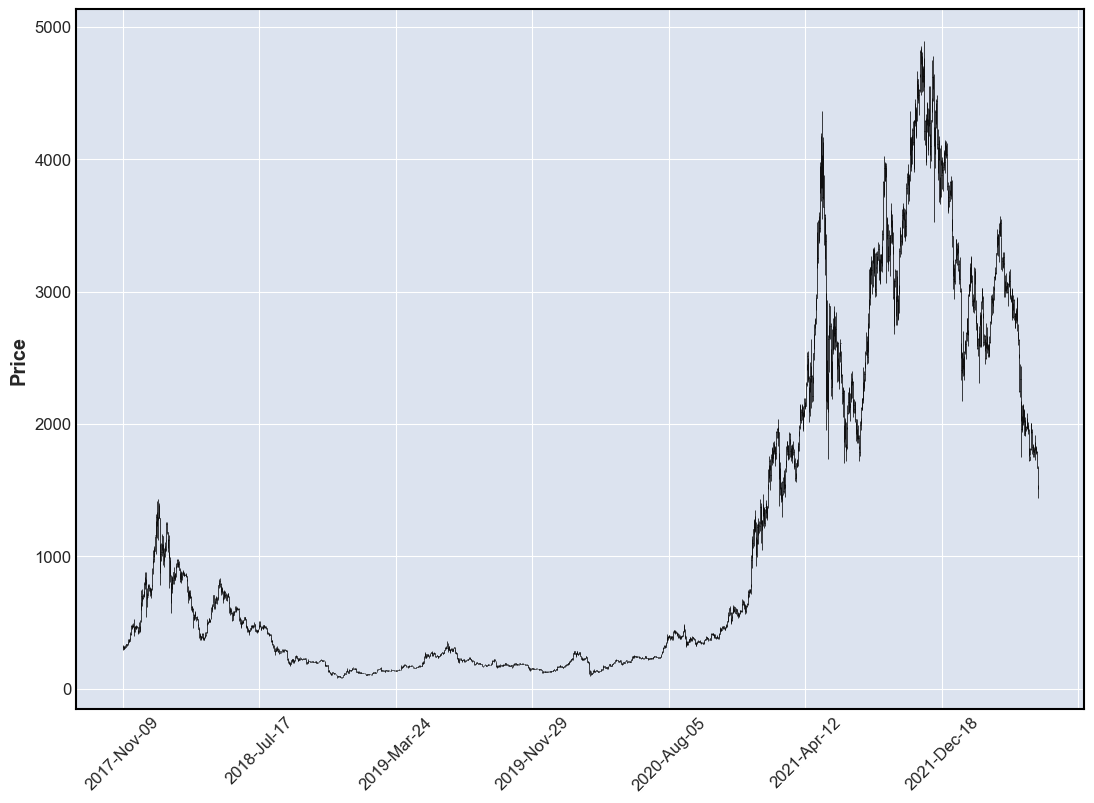

In [19]:
mpf.plot(eth_usd, figsize=(14,10))

In [20]:
mpf.plot(eth_usd, savefig='image1.png')

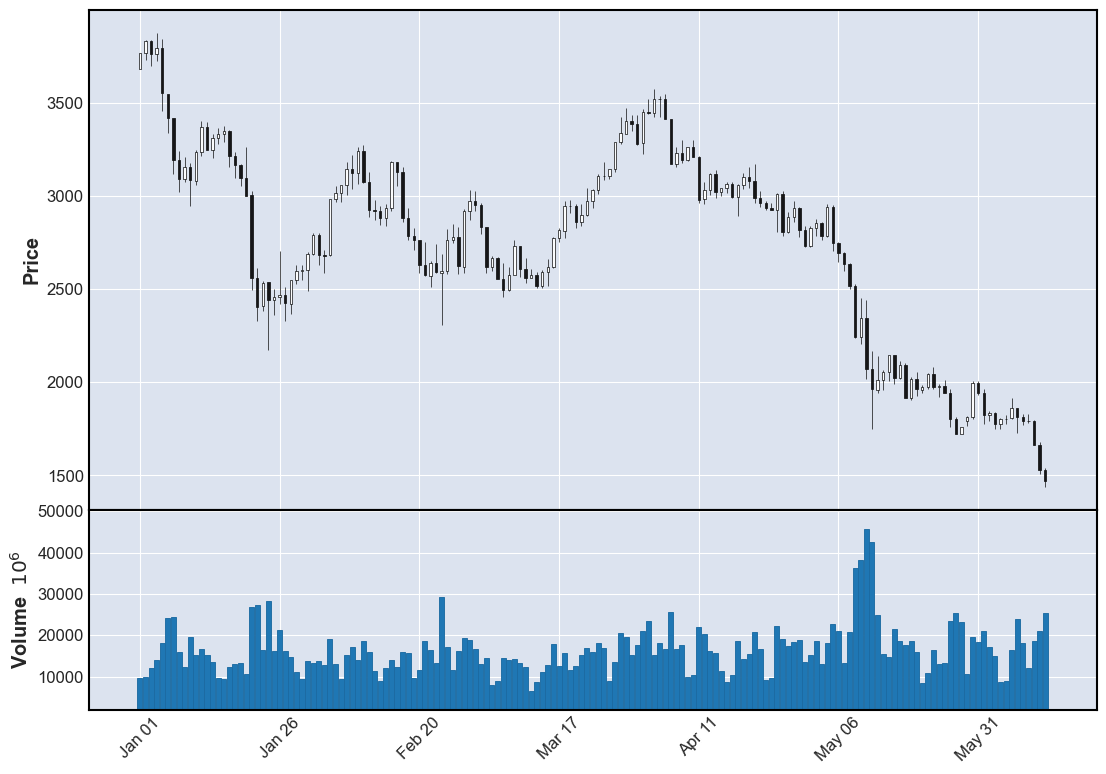

In [47]:
mpf.plot(eth_usd["2022-01-01":"2022-06-12"], figsize=(14,10), type="candle", volume=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1677 entries, 2017-11-09 to 2022-06-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1677 non-null   float64
 1   High          1677 non-null   float64
 2   Low           1677 non-null   float64
 3   Close         1677 non-null   float64
 4   Volume        1677 non-null   int64  
 5   Dividends     1677 non-null   int64  
 6   Stock Splits  1677 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 169.4 KB


# Preprocessing of mpf

In [78]:
data.Date = pd.to_datetime(data.Date)
data = data.set_index("Date")

AttributeError: 'DataFrame' object has no attribute 'Date'

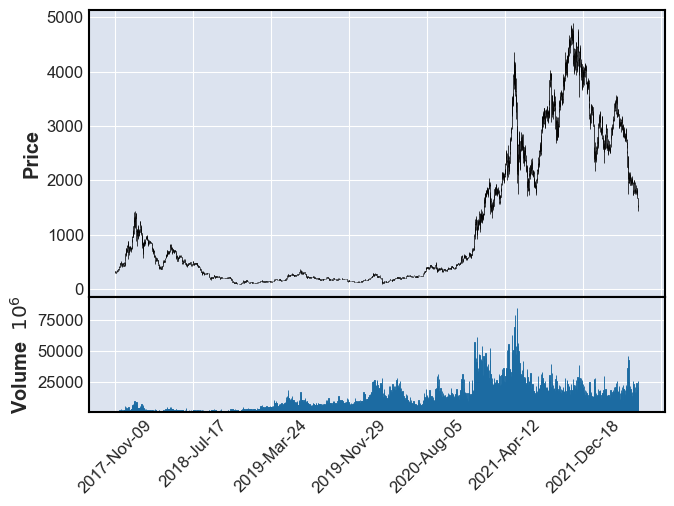

In [79]:
mpf.plot(data, volume=True)

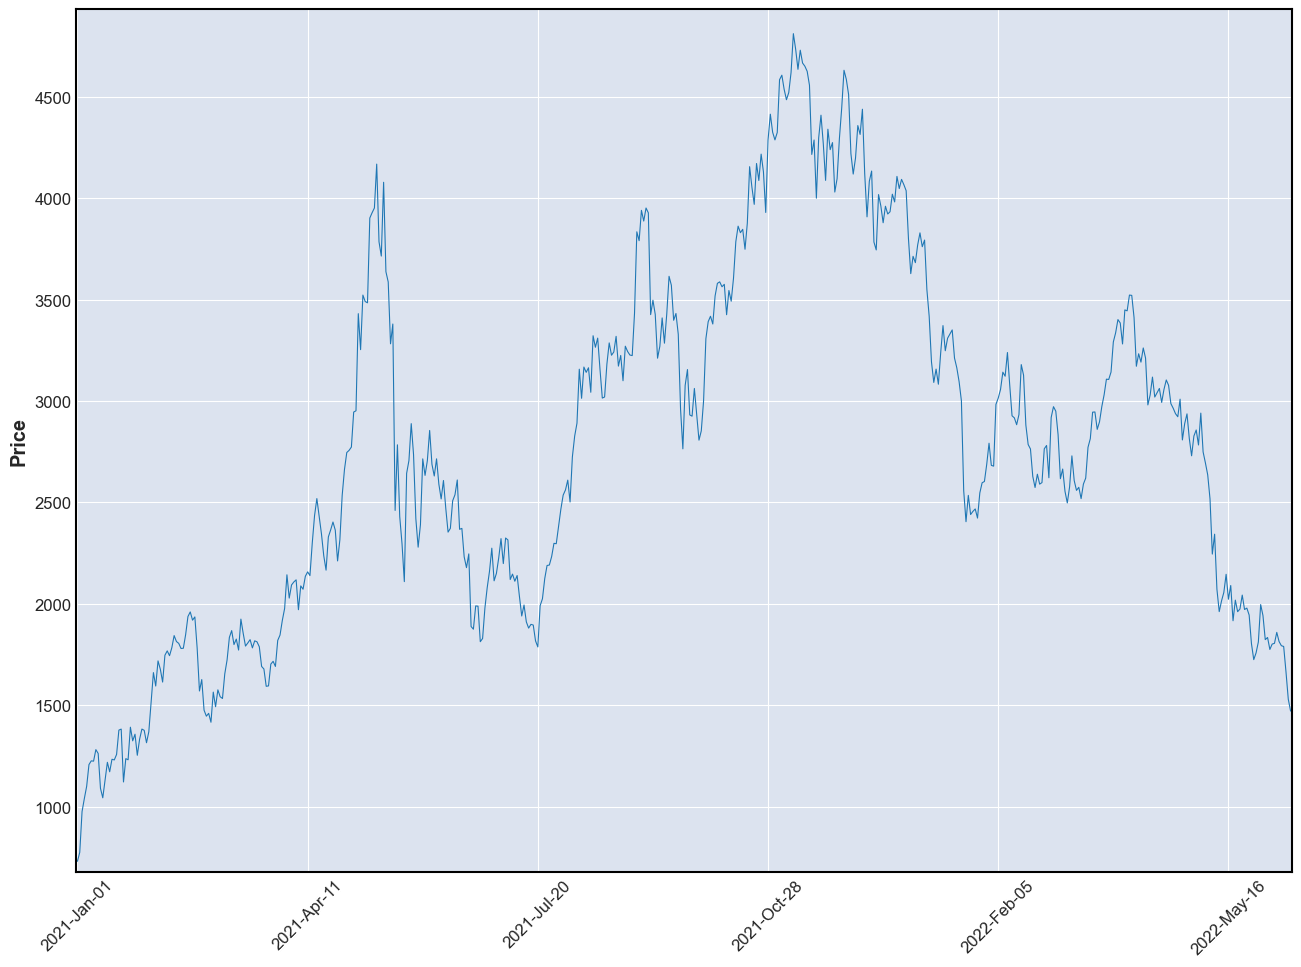

In [80]:
mpf.plot(data['2021':'2022'], type='line', figsize=(14,10), tight_layout=True)

<AxesSubplot:xlabel='Date'>

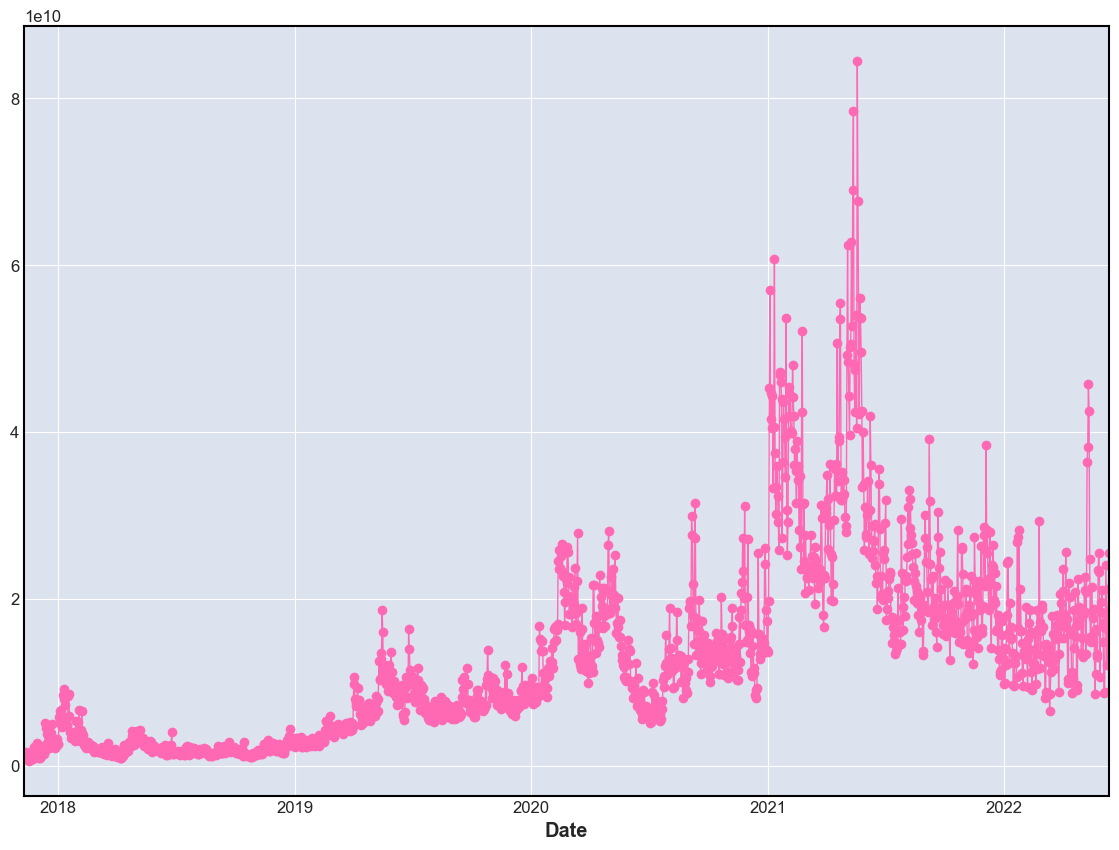

In [73]:
data["Volume"].plot(figsize=(14,10), marker="o", color="hotpink", lw=1, grid=True)

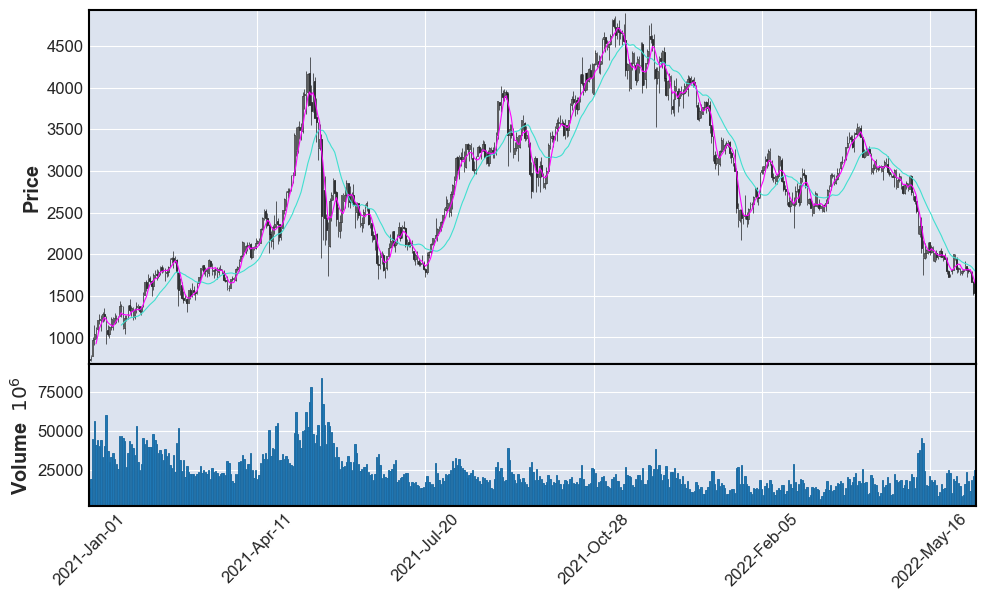

In [76]:
mpf.plot(data['2021':'2022'], type='candle', volume=True, #Moving Average 
        mav=(20,5), tight_layout=True, figratio=(16,9))

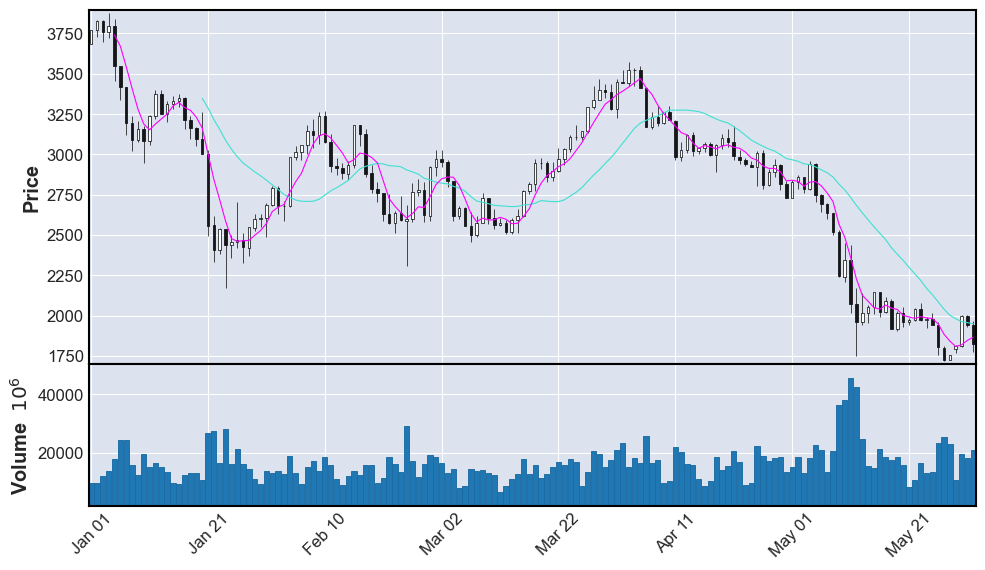

In [77]:
mpf.plot(data['2022-01-01':'2022-06-01'], type='candle', volume=True, #Moving Average 
        mav=(20,5), tight_layout=True, figratio=(16,9))

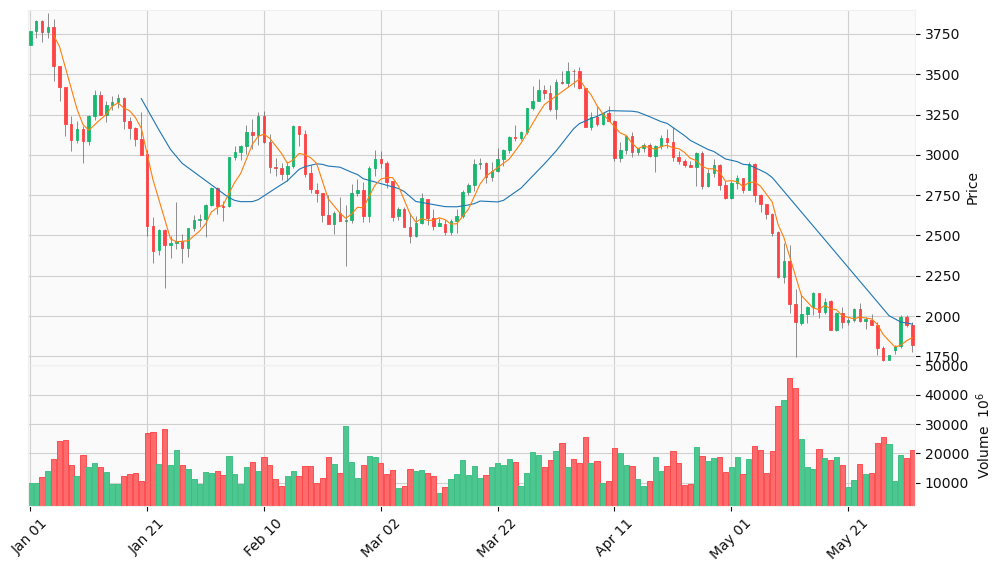

In [81]:
mpf.plot(data['2022-01-01':'2022-06-01'], type='candle', volume=True, #Moving Average 
        mav=(20,5), tight_layout=True, figratio=(16,9), style='yahoo')

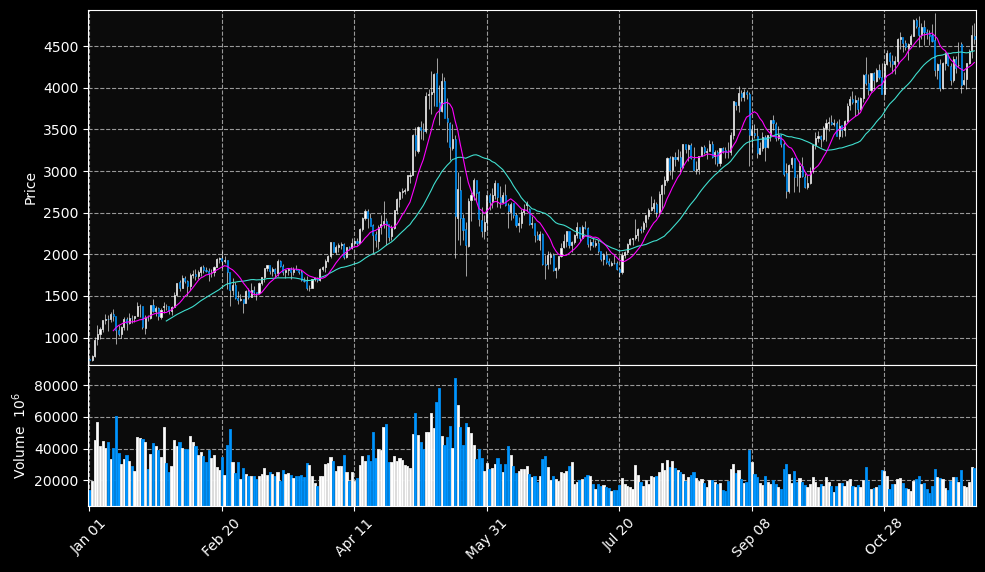

In [85]:
mpf.plot(data['2021-01-01':'2021-12-01'], type='candle', volume=True, 
        mav=(30,10), tight_layout=True, figratio=(16,9), style='nightclouds')

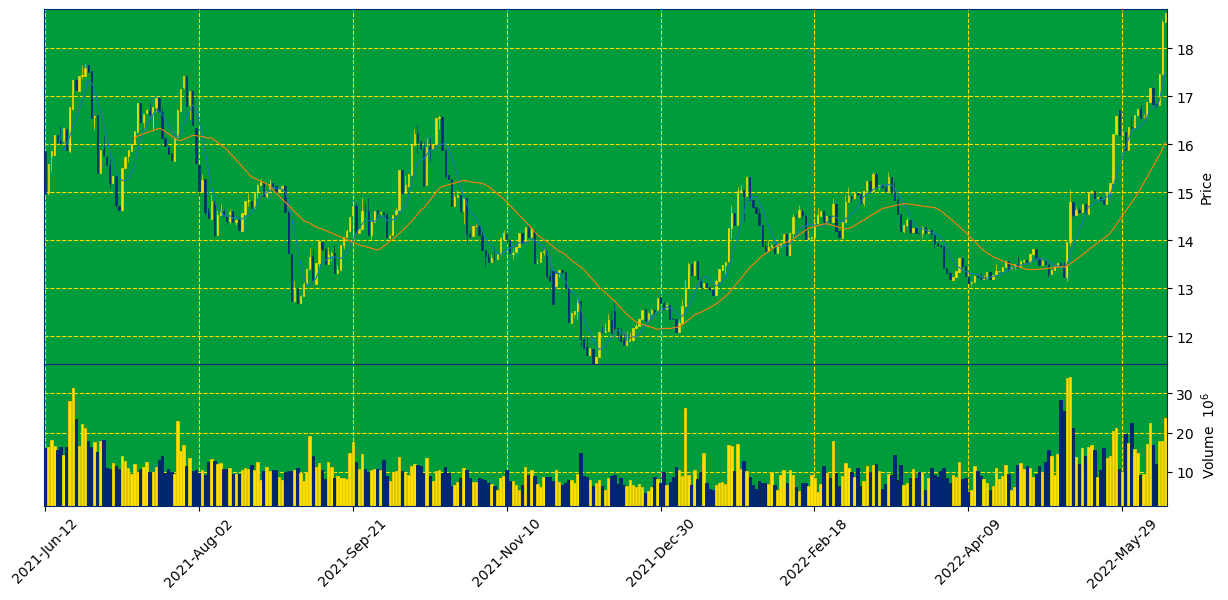

In [140]:
mpf.plot(yf.Ticker("BTC-ETH").history(period='1y'), type='candle', volume=True, figratio=(18,8), mav=(7,30),
        style='brasil', tight_layout=True) # Current Situation of BTC and USD for 1 year

In [141]:
def BollingerBand(data, n_lookback, n_std=2):
    hlc_avg = (data.High + data.Low + data.Close)
    mean, std = hlc_avg.rolling(n_lookback).mean(), hlc_avg.rolling(n_lookback).std()
    upper, lower = mean + std * n_std, mean - std * n_std
    return upper, lower

In [142]:
data["BBUp"], data["BBDown"] = BollingerBand(data , 20, 2)

In [143]:
data = data.dropna()
data

,Open,High,Low,Close,Volume,Stock Splits,BBUp,BBDown
Date,,,,,,,,
2017-12-17,696.237000,735.825012,696.237000,719.974976,2147389952,0,2214.628384,934.241531
2017-12-18,721.731995,803.927979,689.231018,794.645020,3249230080,0,2327.794039,907.683378
2017-12-19,793.901001,881.943970,785.341980,826.822998,4096549888,0,2473.866397,873.531811
2017-12-20,827.515991,845.062012,756.004028,819.085999,3969939968,0,2576.024886,882.003123
2017-12-21,820.236023,880.543030,792.689026,821.062988,3569060096,0,2679.691928,891.019483
...,...,...,...,...,...,...,...,...
2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,18041476023,0,6165.753816,5071.411845
2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,12013083393,0,6124.649958,5057.935540
2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,18504740451,0,6102.886615,5001.889337


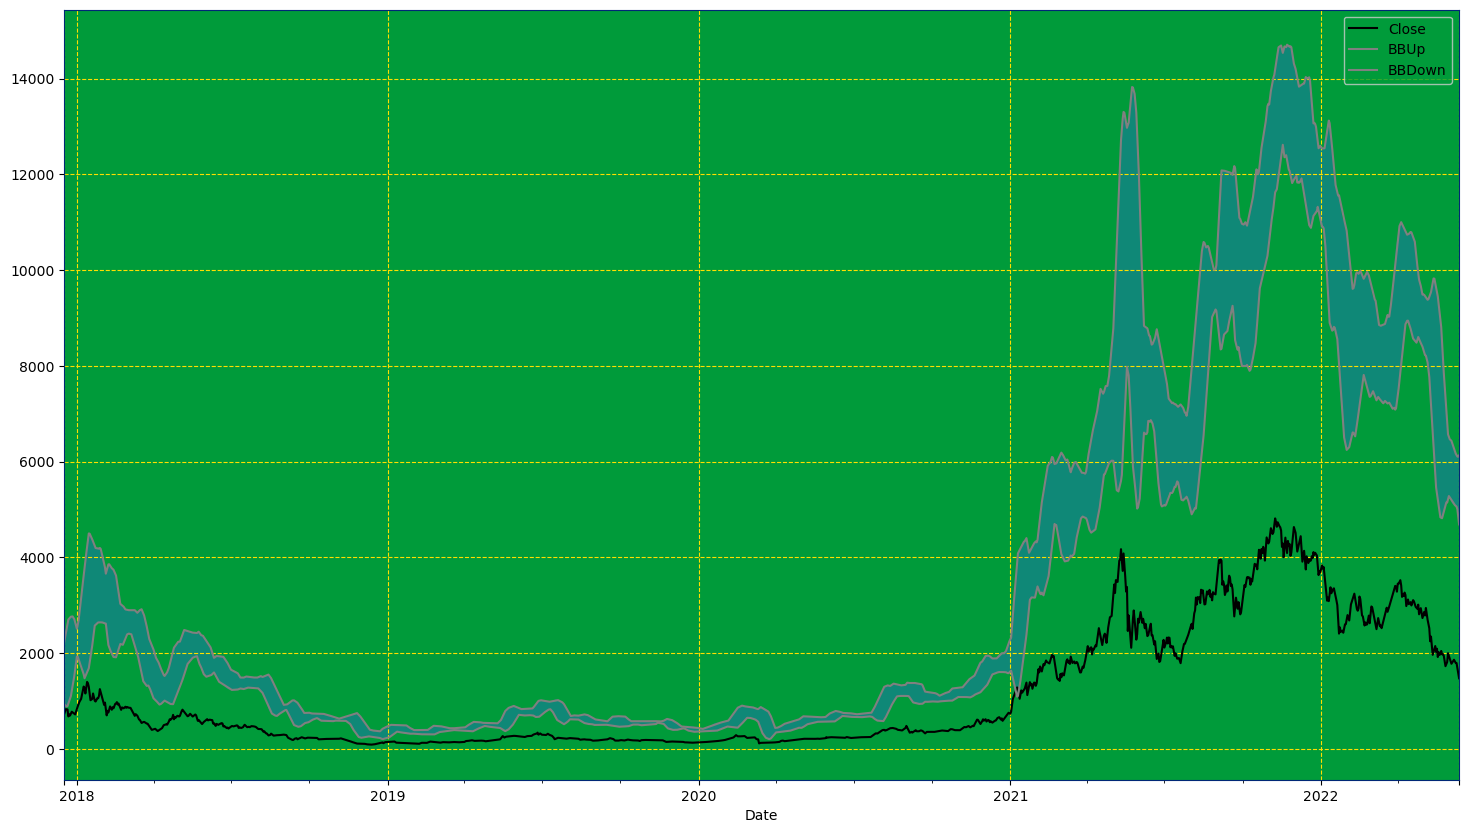

In [150]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
ax = data[["Close", "BBUp", "BBDown"]].plot(figsize=(18,10), color=['black', 'grey', 'grey'])
ax.fill_between(data.index, data["BBUp"], data["BBDown"], alpha=0.5)

In [158]:
#Calculate Bollinger Band

# Calculate SMA
data["sma"] = data["Close"].rolling(20).mean()
#Calculate STD
data["std"] = data["Close"].rolling(20).std()
#Calculate Lower Band
data["lb"] = data["sma"] - 2 * data["std"]
#Calculayte Upper Band
data["ub"] = data["sma"] + 2* data["std"]

data.dropna(inplace=True) #Inplace use to locate NaN
data

,Open,High,Low,Close,Volume,Stock Splits,BBUp,BBDown,sma,std,lb,ub
Date,,,,,,,,,,,,
2018-01-05,975.750000,1075.390015,956.325012,997.719971,6683149824,0,2937.859819,1808.355879,796.777542,93.293366,610.190811,983.364273
2018-01-06,995.153992,1060.709961,994.622009,1041.680054,4662219776,0,3060.340775,1780.372427,812.862796,106.195769,600.471257,1025.254335
2018-01-07,1043.010010,1153.170044,1043.010010,1153.170044,5569880064,0,3232.188911,1714.678899,830.789047,130.449307,569.890433,1091.687662
2018-01-08,1158.260010,1266.930054,1016.049988,1148.530029,8450970112,0,3391.862147,1648.745775,846.874399,148.517630,549.839138,1143.909660
2018-01-09,1146.000000,1320.979980,1145.489990,1299.739990,7965459968,0,3619.704639,1555.509076,870.907098,179.451779,512.003540,1229.810657
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,18041476023,0,6165.753816,5071.411845,1870.954907,94.622277,1681.710353,2060.199461
2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,12013083393,0,6124.649958,5057.935540,1862.380426,93.769179,1674.842068,2049.918784
2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,18504740451,0,6102.886615,5001.889337,1846.906622,99.641252,1647.624118,2046.189127


In [193]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
plt.rcParams["figure.figsize"] = (22,10)
fig = px.line(data['2021':'2022'], y=["Close", "sma", "lb", "ub"])
fig

In [194]:
#Find Out the Signals

In [238]:
def find_signal(close, lower_band, upper_band):
    if close < lower_band:
        return 'Buy'
    elif close > upper_band:
        return 'Sell'
    
data["signal"] = np.vectorize(find_signal)(data['Close'], data['lb'], data['ub'])
data
    

,Open,High,Low,Close,Volume,Stock Splits,BBUp,BBDown,sma,std,lb,ub,signal
Date,,,,,,,,,,,,,
2018-01-05,975.750000,1075.390015,956.325012,997.719971,6683149824,0,2937.859819,1808.355879,796.777542,93.293366,610.190811,983.364273,Sell
2018-01-06,995.153992,1060.709961,994.622009,1041.680054,4662219776,0,3060.340775,1780.372427,812.862796,106.195769,600.471257,1025.254335,Sell
2018-01-07,1043.010010,1153.170044,1043.010010,1153.170044,5569880064,0,3232.188911,1714.678899,830.789047,130.449307,569.890433,1091.687662,Sell
2018-01-08,1158.260010,1266.930054,1016.049988,1148.530029,8450970112,0,3391.862147,1648.745775,846.874399,148.517630,549.839138,1143.909660,Sell
2018-01-09,1146.000000,1320.979980,1145.489990,1299.739990,7965459968,0,3619.704639,1555.509076,870.907098,179.451779,512.003540,1229.810657,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,18041476023,0,6165.753816,5071.411845,1870.954907,94.622277,1681.710353,2060.199461,None
2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,12013083393,0,6124.649958,5057.935540,1862.380426,93.769179,1674.842068,2049.918784,None
2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,18504740451,0,6102.886615,5001.889337,1846.906622,99.641252,1647.624118,2046.189127,None


In [242]:
import MetaTrader5 as mt5
from datetime import datetime, timedelta

mt5.initialize()

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

In [234]:
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price  = None
        self.profit = None
        self.status = "Open"
        
    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == "Buy" \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = "closed"
        
        def _asdict(self):
            return{
                'open_datetime': self.open_datetime,
                'open_price': self.open_price,
                'order_type': self.order_type,
                'volume': self.volume,
                'sl': self.sl,
                'tp': self.tp,
                'close_datetime': self.close_datetime,
                'close_price': self.close_price,
                'profit': self.profit,
                'status': self.status
            }
class Strategy:
    def __init__(self, df, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.position = []
        self.data = df
        
    def get_position_df(self):
        df = pd.DataFrame([position.asdict() for position in self.position])
        df['pnl'] = df['profit'].cumsum() +self.starting_balance
        return df
    def add_position(self, position):
        self.position.append(position)
    def trading_allowed(self):
        for pos in self.positions:
            if pos.status == 'open':
                return False
        
        return True
    
    def run(self):
        for i, data in self.data.iterrow():
            
            if data.signal == 'buy' and self.trading_allowed():
                sl = data.close - 3 * data.std
                tp = data.close + 2 * data.std
                self.add_position(Position(date.time, data.close, data.signal, self.volume, sl, tp))
            elif data.signal == 'sell' and self.trading_allowed():
                sl = data.close - 3 * data.std
                tp = data.close + 2 * data.std
                self.add_position(Position(date.time, data.close, data.signal, self.volume, sl, tp))
                
            for pos in self.positions:
                if pos.status == 'open':
                    if (pos.sl >= data.close and pos.order_type == 'buy'):
                        pos.close_position(date.time, pos.sl)
                    elif (pos.sl <= data.close and pos.order_type == 'sell'):
                        pos.close_position(date.time, pos.sl)
                    elif (pos.sl <= data.close and pos.order_type == 'buy'):
                        pos.close_position(date.time, pos.tp)
                    elif (pos.sl >= data.close and pos.order_type == 'sell'):
                        pos.close_position(date.time, pos.tp)
                        
        return self.get_position_df()
                        